In [1]:
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import sem
from scipy.stats import linregress
from scipy.stats import f_oneway
from sklearn import datasets
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import scipy.stats as st
import pandas as pd

In [2]:
#Specifying file paths
movie_data = "Resource/movie_clean.csv"

#Reading all data into Pandas
movie_data_df = pd.read_csv(movie_data)

#Print the csv
movie_data_df

,Rank,Title,Duration (min),Rating,Director,Cast,Release Date,Production Cost,Worldwide Gross,Opening Weekend,MPAA,Genre
0,0,Avengers: Endgame,181.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Evans, Mar...",2019-04-23,400000000,2797800564,357115007.0,PG-13,Action
1,1,Pirates of the Caribbean: On Stranger Tides,137.0,6.6,Rob Marshall,"Johnny Depp, Penélope Cruz, Ian McShane, Geoff...",2011-05-20,379000000,1045713802,90151958.0,PG-13,Adventure
2,2,Avengers: Age of Ultron,141.0,7.3,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015-04-22,365000000,1395316979,191271109.0,PG-13,Action
3,4,Avengers: Infinity War,149.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Hemsworth,...",2018-04-25,300000000,2048359754,257698183.0,PG-13,Action
4,6,Justice League,120.0,6.1,Zack Snyder,"Ben Affleck, Gal Gadot, Jason Momoa, Ezra Miller",2017-11-13,300000000,655945209,93842239.0,PG-13,Action
...,...,...,...,...,...,...,...,...,...,...,...,...
455,544,A Good Day to Die Hard,98.0,5.2,John Moore,"Bruce Willis, Jai Courtney, Sebastian Koch, Ma...",2013-02-06,92000000,304249198,24834845.0,R,Action
456,545,The Alamo,162.0,6.8,John Wayne,"John Wayne, Richard Widmark, Laurence Harvey, ...",2004-04-09,92000000,23911362,9124701.0,PG-13,Western
457,546,The Alamo,137.0,6.0,John Lee Hancock,"Dennis Quaid, Billy Bob Thornton, Emilio Echev...",2004-04-09,92000000,23911362,9124701.0,PG-13,Western
458,547,Cutthroat Island,124.0,5.7,Renny Harlin,"Geena Davis, Matthew Modine, Frank Langella, M...",1995-12-22,92000000,18517322,2371415.0,PG-13,Adventure


In [3]:
# Split the Cast column by commas, take the first two names, and join them back together
movie_data_df['Cast'] = movie_data_df['Cast'].str.split(',').apply(lambda x: ', '.join(x[:2]))

# Check the results to ensure the transformation
#filtered_df = movie_data_df[movie_data_df['Cast'].str.split(',').apply(len) == 2]
# Split the Cast column into two separate columns
movie_data_df[['Actor1', 'Actor2']] = movie_data_df['Cast'].str.split(',', n=1, expand=True)
#filtered_df
movie_data_df

,Rank,Title,Duration (min),Rating,Director,Cast,Release Date,Production Cost,Worldwide Gross,Opening Weekend,MPAA,Genre,Actor1,Actor2
0,0,Avengers: Endgame,181.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr.",2019-04-23,400000000,2797800564,357115007.0,PG-13,Action,Joe Russo,Robert Downey Jr.
1,1,Pirates of the Caribbean: On Stranger Tides,137.0,6.6,Rob Marshall,"Johnny Depp, Penélope Cruz",2011-05-20,379000000,1045713802,90151958.0,PG-13,Adventure,Johnny Depp,Penélope Cruz
2,2,Avengers: Age of Ultron,141.0,7.3,Joss Whedon,"Robert Downey Jr., Chris Evans",2015-04-22,365000000,1395316979,191271109.0,PG-13,Action,Robert Downey Jr.,Chris Evans
3,4,Avengers: Infinity War,149.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr.",2018-04-25,300000000,2048359754,257698183.0,PG-13,Action,Joe Russo,Robert Downey Jr.
4,6,Justice League,120.0,6.1,Zack Snyder,"Ben Affleck, Gal Gadot",2017-11-13,300000000,655945209,93842239.0,PG-13,Action,Ben Affleck,Gal Gadot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,544,A Good Day to Die Hard,98.0,5.2,John Moore,"Bruce Willis, Jai Courtney",2013-02-06,92000000,304249198,24834845.0,R,Action,Bruce Willis,Jai Courtney
456,545,The Alamo,162.0,6.8,John Wayne,"John Wayne, Richard Widmark",2004-04-09,92000000,23911362,9124701.0,PG-13,Western,John Wayne,Richard Widmark
457,546,The Alamo,137.0,6.0,John Lee Hancock,"Dennis Quaid, Billy Bob Thornton",2004-04-09,92000000,23911362,9124701.0,PG-13,Western,Dennis Quaid,Billy Bob Thornton
458,547,Cutthroat Island,124.0,5.7,Renny Harlin,"Geena Davis, Matthew Modine",1995-12-22,92000000,18517322,2371415.0,PG-13,Adventure,Geena Davis,Matthew Modine


In [4]:
# Strip any leading/trailing whitespace from the new columns
movie_data_df['Actor1'] = movie_data_df['Actor1'].str.strip()
movie_data_df['Actor2'] = movie_data_df['Actor2'].str.strip()

# Combine both actor columns into a single column for analysis
exploded_df = movie_data_df.melt(id_vars=[col for col in movie_data_df.columns if col not in ['Actor1', 'Actor2']],
                                 value_vars=['Actor1', 'Actor2'],
                                 value_name='Actor').drop('variable', axis=1)
exploded_df

,Rank,Title,Duration (min),Rating,Director,Cast,Release Date,Production Cost,Worldwide Gross,Opening Weekend,MPAA,Genre,Actor
0,0,Avengers: Endgame,181.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr.",2019-04-23,400000000,2797800564,357115007.0,PG-13,Action,Joe Russo
1,1,Pirates of the Caribbean: On Stranger Tides,137.0,6.6,Rob Marshall,"Johnny Depp, Penélope Cruz",2011-05-20,379000000,1045713802,90151958.0,PG-13,Adventure,Johnny Depp
2,2,Avengers: Age of Ultron,141.0,7.3,Joss Whedon,"Robert Downey Jr., Chris Evans",2015-04-22,365000000,1395316979,191271109.0,PG-13,Action,Robert Downey Jr.
3,4,Avengers: Infinity War,149.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr.",2018-04-25,300000000,2048359754,257698183.0,PG-13,Action,Joe Russo
4,6,Justice League,120.0,6.1,Zack Snyder,"Ben Affleck, Gal Gadot",2017-11-13,300000000,655945209,93842239.0,PG-13,Action,Ben Affleck
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,544,A Good Day to Die Hard,98.0,5.2,John Moore,"Bruce Willis, Jai Courtney",2013-02-06,92000000,304249198,24834845.0,R,Action,Jai Courtney
916,545,The Alamo,162.0,6.8,John Wayne,"John Wayne, Richard Widmark",2004-04-09,92000000,23911362,9124701.0,PG-13,Western,Richard Widmark
917,546,The Alamo,137.0,6.0,John Lee Hancock,"Dennis Quaid, Billy Bob Thornton",2004-04-09,92000000,23911362,9124701.0,PG-13,Western,Billy Bob Thornton
918,547,Cutthroat Island,124.0,5.7,Renny Harlin,"Geena Davis, Matthew Modine",1995-12-22,92000000,18517322,2371415.0,PG-13,Adventure,Matthew Modine


In [5]:
# Calculate the total Worldwide Gross for each actor
actor_sales_df = exploded_df.groupby('Actor')['Worldwide Gross'].sum().reset_index()

# Sort the DataFrame by Worldwide Gross in descending order
actor_sales_df_sorted = actor_sales_df.sort_values(by='Worldwide Gross', ascending=False)

# Display the sorted DataFrame
actor_sales_df_sorted.head(10)

,Actor,Worldwide Gross
427,Robert Downey Jr.,9749979518
251,Joe Russo,6712480728
193,Ian McKellen,5472914902
88,Chris Evans,5365878722
267,Johnny Depp,4956803021
151,Emma Watson,4815411924
312,Leonardo DiCaprio,4775940063
488,Tom Cruise,4624334052
115,Daniel Radcliffe,4420632419
114,Daniel Craig,4303410696


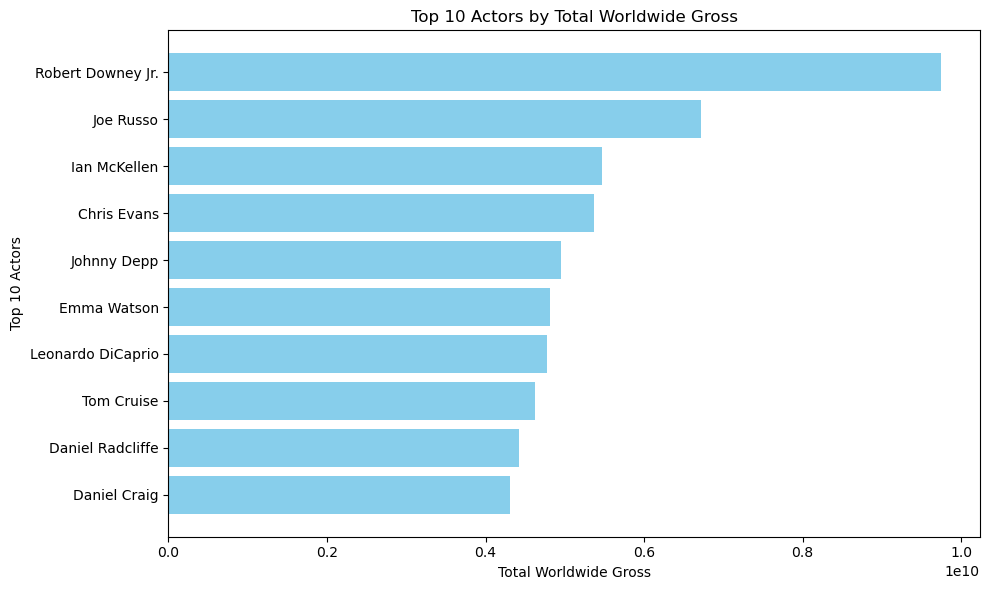

In [6]:
# Top 10 Actors by Total Worldwide Gross - Barh Chart
top_actors = actor_sales_df_sorted.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_actors['Actor'], top_actors['Worldwide Gross'], color='skyblue')
plt.xlabel('Total Worldwide Gross')
plt.ylabel('Top 10 Actors')
plt.title('Top 10 Actors by Total Worldwide Gross')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('movie_analysis_visualizations/actor_vs_worldwide_sales.png')
plt.show()

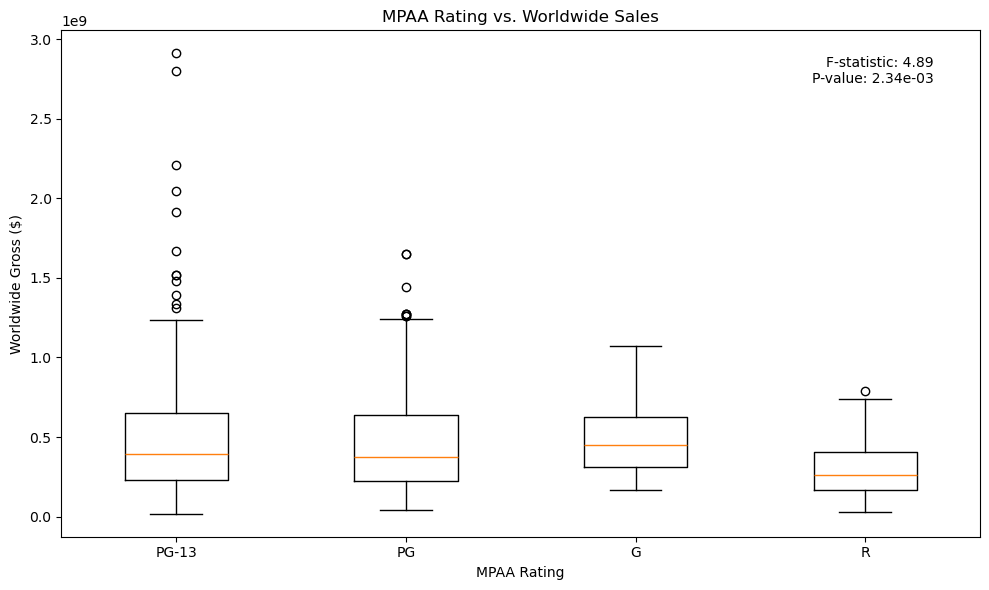

In [7]:
# MPAA Rating vs. Worldwide Sales - Box Plot
plt.figure(figsize=(10, 6))
mpaa_ratings = movie_data_df['MPAA'].unique()
mpaa_data = [movie_data_df[movie_data_df['MPAA'] == rating]['Worldwide Gross'] for rating in mpaa_ratings]
plt.boxplot(mpaa_data, labels=mpaa_ratings)
plt.xlabel('MPAA Rating')
plt.ylabel('Worldwide Gross ($)')
plt.title('MPAA Rating vs. Worldwide Sales')

# ANOVA test between multiple MPAA rating groups (G, PG, PG-13, R)
group_g = movie_data_df[movie_data_df['MPAA'] == 'G']['Worldwide Gross'].dropna()
group_pg = movie_data_df[movie_data_df['MPAA'] == 'PG']['Worldwide Gross'].dropna()
group_pg_13 = movie_data_df[movie_data_df['MPAA'] == 'PG-13']['Worldwide Gross'].dropna()
group_r = movie_data_df[movie_data_df['MPAA'] == 'R']['Worldwide Gross'].dropna()
f_stat, p_val = f_oneway(group_g, group_pg, group_pg_13, group_r)

# Simple annotation with F-statistic and p-value
plt.text(0.95, 0.95, f'F-statistic: {f_stat:.2f}\nP-value: {p_val:.2e}',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig('movie_analysis_visualizations/mpaa_rating_vs_avg_worldwide_sales_bx.png')
plt.show()